In [1]:
# Import necessary libraries
from shapely.geometry import Polygon, LineString
import networkx as nx
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


rack and obstacle generation

In [2]:
def generate_racks(rows, cols, rack_size=1000, spacing=500):
    """
    Generates rack polygons for a grid layout.
    :param rows: Number of rows of racks
    :param cols: Number of columns of racks
    :param rack_size: Size of each rack in mm (default: 1000)
    :param spacing: Spacing between racks in mm (default: 500)
    :return: (list of rack polygons, list of rack labels)
    """
    rack_polygons = []
    rack_labels = []

    for row in range(rows):
        for col in range(cols):
            # Bottom-left corner
            x_start = col * (rack_size + spacing)
            y_start = row * (rack_size + spacing)

            # Create a polygon
            rack_polygon = Polygon([
                (x_start, y_start),  # Bottom-left
                (x_start, y_start + rack_size),  # Top-left
                (x_start + rack_size, y_start + rack_size),  # Top-right
                (x_start + rack_size, y_start)  # Bottom-right
            ])
            rack_polygons.append(rack_polygon)
            rack_labels.append(f"Rack-{row+1}-{col+1}")

    return rack_polygons, rack_labels


def generate_obstacles():
    """
    Generate obstacle polygons (e.g., machinery or walls).
    :return: List of obstacle polygons
    """
    obstacles = [
        Polygon([(2000, 2000), (2000, 2500), (2500, 2500), (2500, 2000)])  # Example obstacle
    ]
    return obstacles


edge validation

In [3]:
def validate_edges(rack_polygons, obstacles):
    """
    Validate edges between rack polygons, avoiding obstacles.
    :param rack_polygons: List of rack polygons
    :param obstacles: List of obstacle polygons
    :return: List of valid edges (tuples of polygon indices)
    """
    valid_edges = []
    for i in range(len(rack_polygons)):
        for j in range(i + 1, len(rack_polygons)):
            # Create a line between centroids of the polygons
            line = LineString([rack_polygons[i].centroid, rack_polygons[j].centroid])

            # Check if the line intersects any obstacle
            if not any(line.intersects(obstacle) for obstacle in obstacles):
                valid_edges.append((i, j))

    return valid_edges


graph visualization

In [4]:
def visualize_graph(rack_polygons, rack_labels, valid_edges):
    """
    Visualizes the graph of racks and connections.
    :param rack_polygons: List of rack polygons
    :param rack_labels: List of rack labels
    :param valid_edges: List of valid edges
    """
    # Initialize graph
    G = nx.Graph()

    # Add nodes (rack labels)
    for i, label in enumerate(rack_labels):
        G.add_node(i, label=label)

    # Add edges
    G.add_edges_from(valid_edges)

    # Define node positions based on polygon centroids
    pos = {i: (rack_polygons[i].centroid.x, rack_polygons[i].centroid.y) for i in range(len(rack_polygons))}

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    plt.title("Warehouse Rack Layout Graph")
    plt.show()


main exec

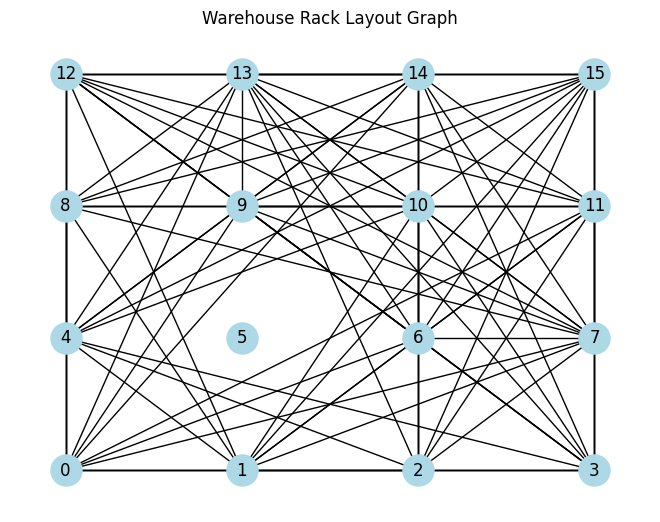

In [5]:
# Generate rack polygons and obstacles
rack_polygons, rack_labels = generate_racks(rows=4, cols=4, rack_size=1000, spacing=500)
obstacles = generate_obstacles()

# Validate edges
valid_edges = validate_edges(rack_polygons, obstacles)

# Visualize the graph
visualize_graph(rack_polygons, rack_labels, valid_edges)
